In [1]:
%matplotlib inline

In [20]:
from pathlib import Path
import matplotlib.pyplot as plt

import json
import git

In [3]:
path = Path(".")
if not path.joinpath("cf-action-counter-db").is_dir():
    !git clone https://github.com/regro/cf-action-counter-db

Cloning into 'cf-action-counter-db'...
remote: Enumerating objects: 272, done.
remote: Counting objects: 100% (272/272), done.
remote: Compressing objects: 100% (137/137), done.
remote: Total 47790 (delta 134), reused 204 (delta 67), pack-reused 47518
Receiving objects: 100% (47790/47790), 10.42 MiB | 10.89 MiB/s, done.
Resolving deltas: 100% (24065/24065), done.


In [26]:
keys = ['appveyor', 'azure-pipelines', 'circleci', 'drone', 'github-actions', 'travis-ci']

In [28]:
from collections import defaultdict

In [36]:
totals = defaultdict(dict)

In [37]:
import os

In [38]:
repo = git.Repo('cf-action-counter-db')
ggit = repo.git
for commit in repo.iter_commits(rev='master'):
    ggit.checkout(commit)
    if os.path.exists('cf-action-counter-db/data/latest.json'):
        with open('cf-action-counter-db/data/latest.json', 'r') as f:
            data = json.load(f)
        for k in keys:
            if k in data and 'rates' in data[k]:
                totals[k].update(data[k]['rates'])

In [40]:
len(totals['azure-pipelines'])

31022

In [41]:
import pandas as pd

In [42]:
df = pd.DataFrame(totals)
df.index = pd.to_datetime(df.index)

In [43]:
df.head()

,appveyor,azure-pipelines,circleci,drone,github-actions,travis-ci
2020-05-16T08:50:00-04:00,0.0,4,1.0,0.0,1,1
2020-05-16T08:55:00-04:00,0.0,12,0.0,0.0,4,0
2020-05-16T09:00:00-04:00,0.0,0,0.0,0.0,0,0
2020-05-16T09:05:00-04:00,0.0,6,0.0,0.0,1,0
2020-05-16T09:10:00-04:00,0.0,19,0.0,0.0,5,1


In [65]:
df2.index = pd.to_datetime(df.index, utc=True)

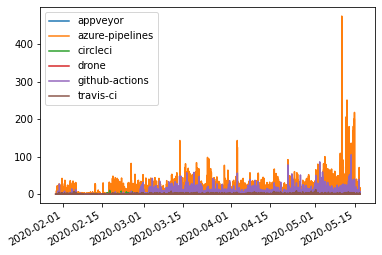

In [66]:
df2.plot()

In [67]:
df2.index = pd.DatetimeIndex(df2.index)

In [71]:
df3 = df2.resample('D').sum()

In [72]:
df3.head()

,appveyor,azure-pipelines,circleci,drone,github-actions,travis-ci
2020-01-29 00:00:00+00:00,0.0,55,0.0,0.0,0,1
2020-01-30 00:00:00+00:00,0.0,1847,0.0,0.0,90,83
2020-01-31 00:00:00+00:00,0.0,1902,0.0,0.0,5,48
2020-02-01 00:00:00+00:00,0.0,722,0.0,0.0,17,55
2020-02-02 00:00:00+00:00,0.0,708,0.0,0.0,2,37


In [77]:
df3.sum()

appveyor             2286.0
azure-pipelines    173693.0
circleci             2929.0
drone                2632.0
github-actions      55842.0
travis-ci            5038.0
dtype: float64

In [ ]:
import matplotlib.pyplot as plt

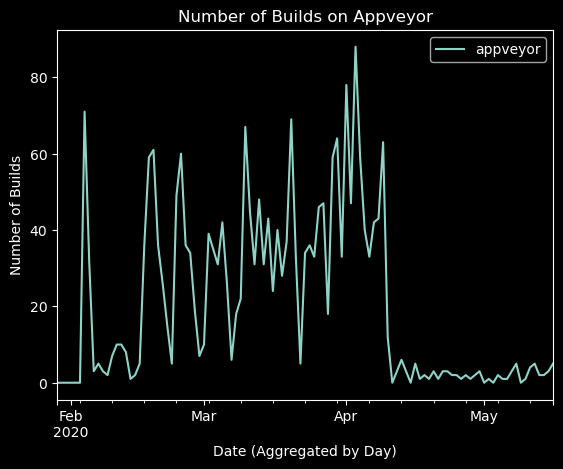

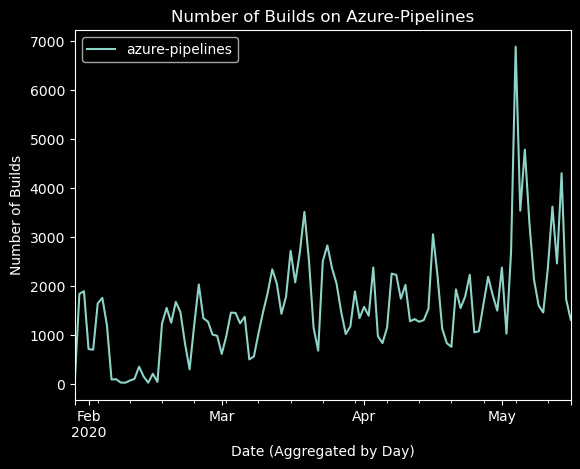

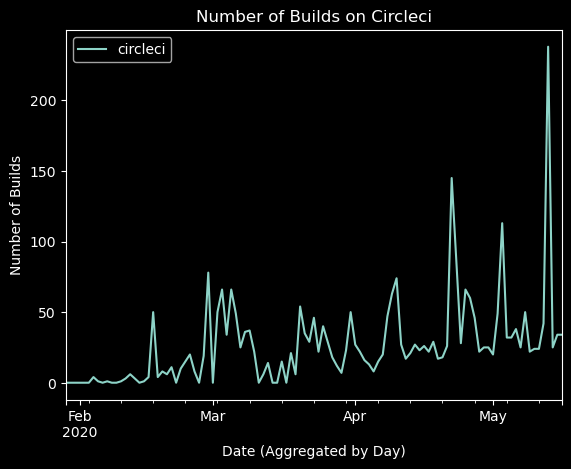

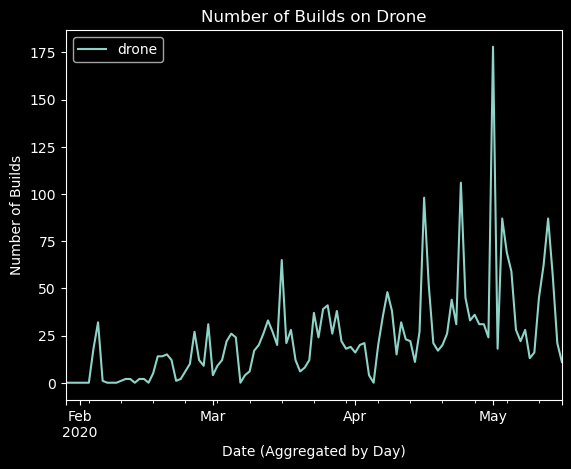

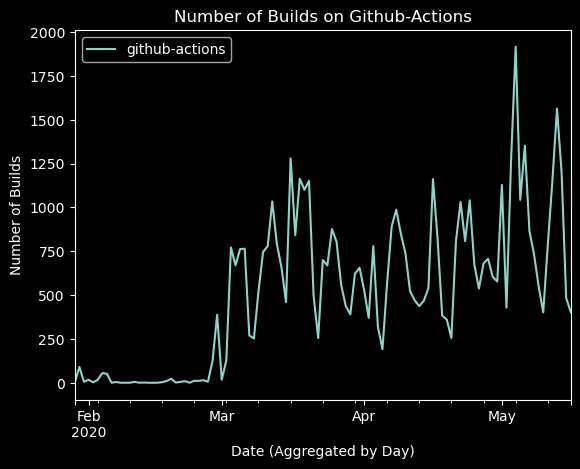

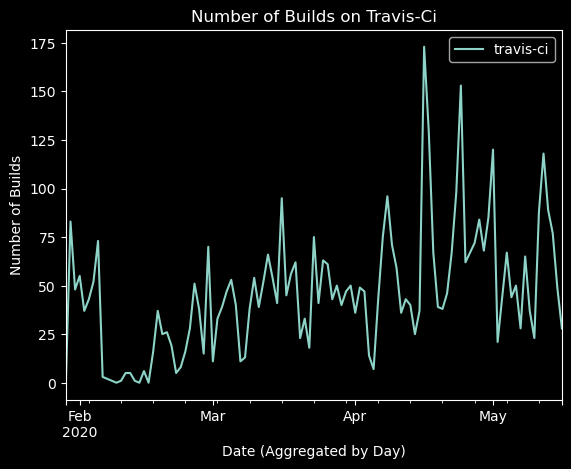

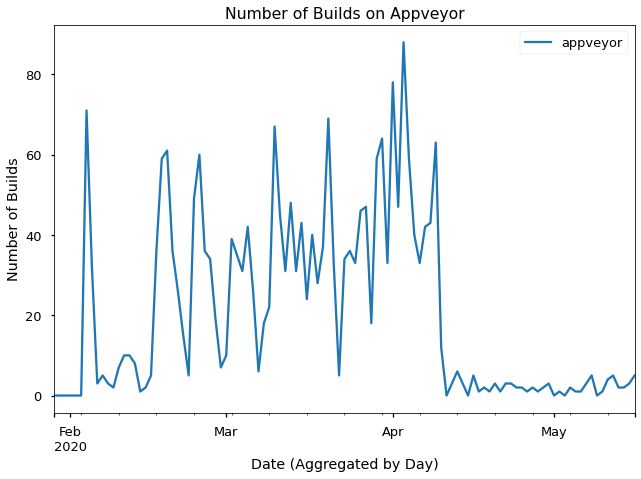

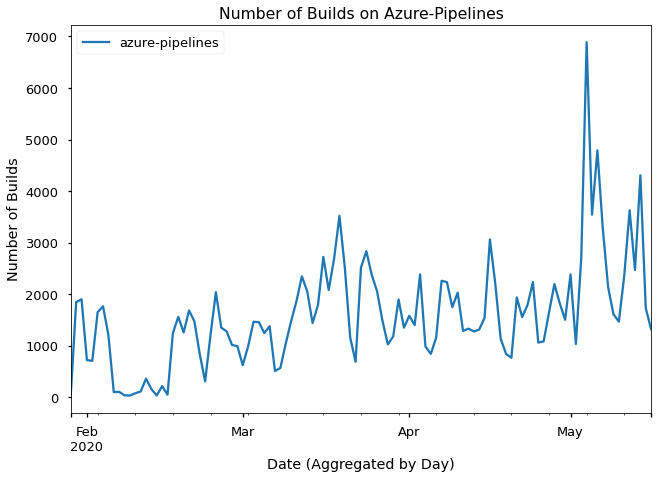

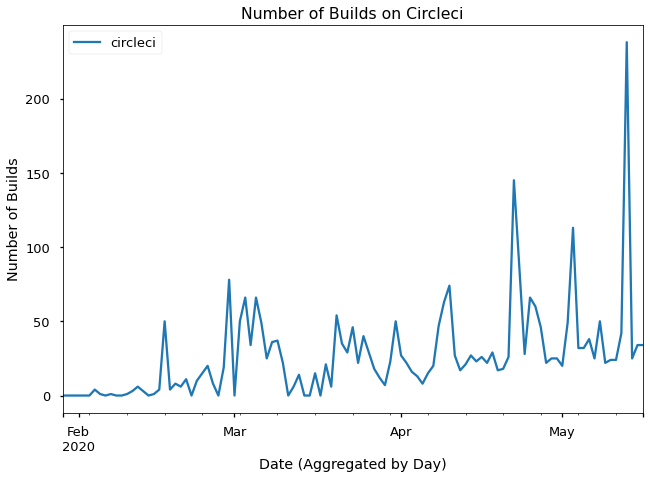

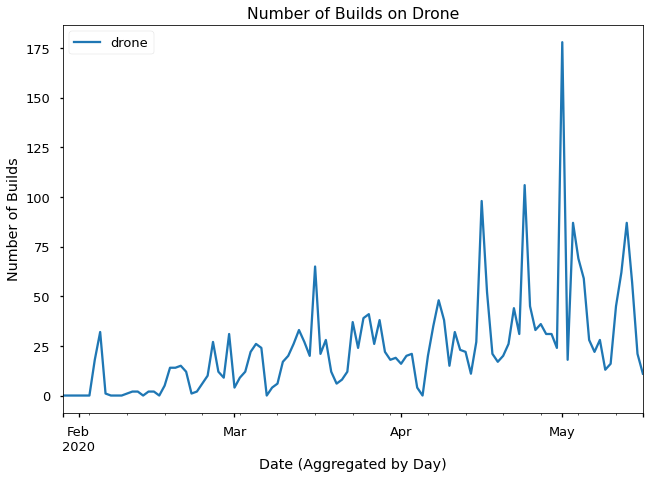

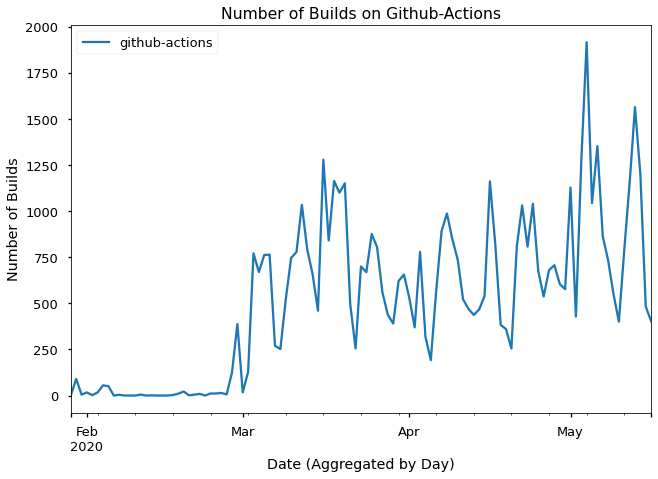

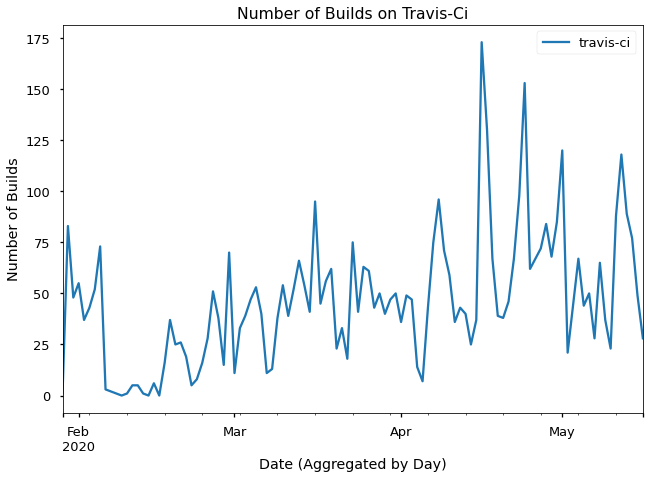

In [79]:
for context in [("dark_background", "seaborn-talk"), ("seaborn-talk", )]:
    with plt.style.context(*context):
        for k in df3.columns:
            fig, ax = plt.subplots()
            df3.plot(y=k, ax=ax)
            ax.set_title(f"Number of Builds on {k.title()}")
            ax.set_xlabel("Date (Aggregated by Day)")
            ax.set_ylabel("Number of Builds")
            fig.savefig(f"plots/builds_{k}-{'_'.join(context)}.png")
    

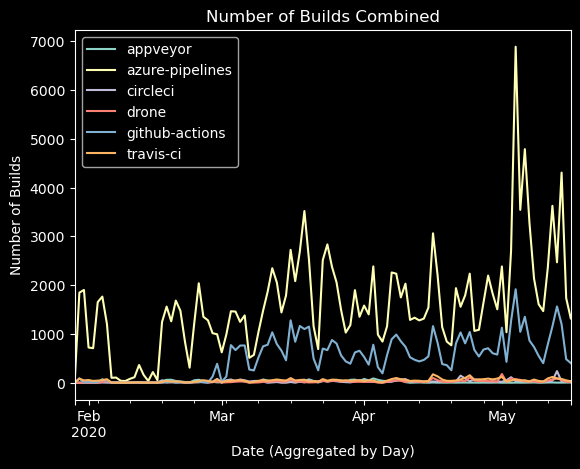

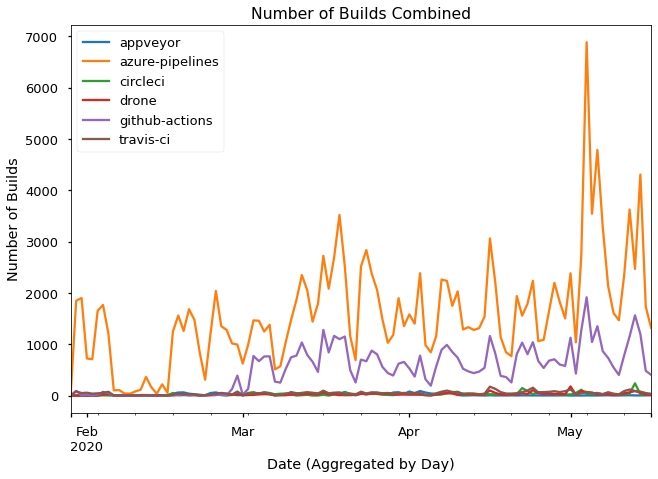

In [83]:
for context in [("dark_background", "seaborn-talk"), ("seaborn-talk", )]:
    with plt.style.context(*context):
        fig, ax = plt.subplots()
        df3.plot(ax=ax, 
#                  logy="sym"
                )
        ax.set_title(f"Number of Builds Combined")
        ax.set_xlabel("Date (Aggregated by Day)")
        ax.set_ylabel("Number of Builds")
#         fig.savefig(f"plots/builds_combined-{'_'.join(context)}.png")

In [13]:
cd -

/home/christopher/dev/conda-forge/by-the-numbers


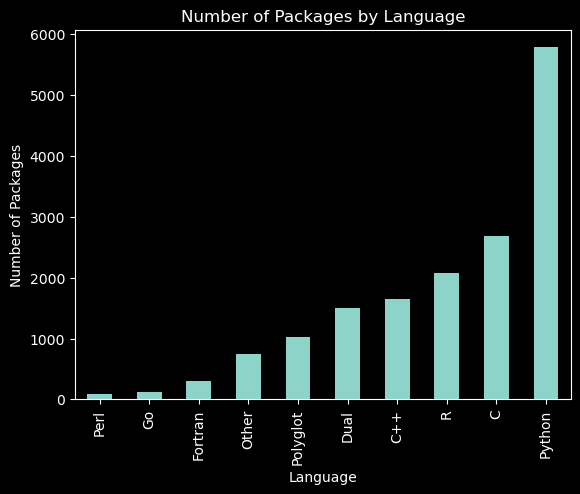

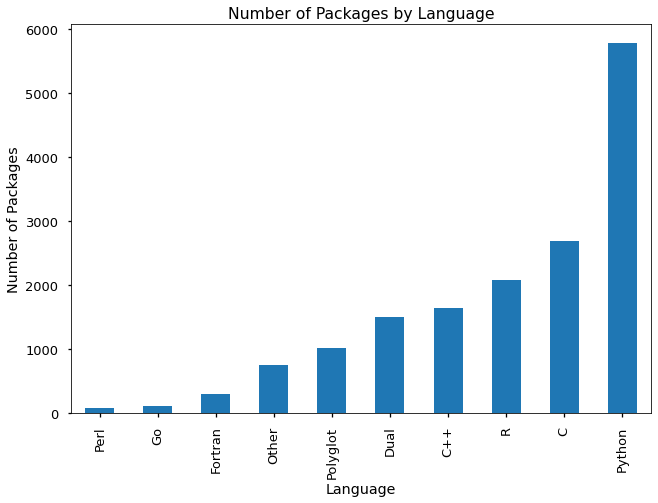

In [14]:
for context in [("dark_background", "seaborn-talk"), ("seaborn-talk", )]:
    with plt.style.context(*context):
        fig, ax = plt.subplots()
        df.plot.bar(legend=False, ax=ax)
        ax.set_title("Number of Packages by Language")
        ax.set_xlabel("Language")
        ax.set_ylabel("Number of Packages")
        fig.savefig(f"plots/n_packages_by_lang-{'_'.join(context)}.png")

In [12]:
import hvplot.pandas  # noqa


df.hvplot.bar(legend=False)

ModuleNotFoundError: No module named 'hvplot'